In [85]:
import alpaca_trade_api as tradeapi
import requests
from dotenv import load_dotenv
import pandas as pd
import os

import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [86]:
load_dotenv(verbose=True)

True

In [87]:
#alpaca_api_key = os.getenv("ALPACA_API_KEY")
#alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key = "PK2QATFJUTTJTLNCCC9E"
alpaca_secret_key = "OpvkG0g84P35EjDZlJZf0fMdJ4ksJiY6YwxNrN4d"
print(alpaca_api_key)

PK2QATFJUTTJTLNCCC9E


In [88]:
def calculate_sharpe_ratio(df):
    
    df_pct_change = df.pct_change()
    #daily_return
    sharpe_ratio = df_pct_change['close'].mean() / df_pct_change['close'].std()
    
    #annualized sharpe ratio
    return (252 ** 0.5) * sharpe_ratio

In [89]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Format current date as ISO format
start_date = pd.Timestamp("2011-05-01", tz="America/New_York").isoformat()
today = pd.Timestamp("2021-01-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["SPY", "QQQ", "VTI",
           "SPBO", "JNK", "LQD",
           "IYR", "VNQ", "USRT",
           "PSP", "USO", "GLD",
           "MUB", "MUNI", "PZA",
           "VMBS", "MBB", "MBG",
           "TLT", "SCHO", "SHY"
           ]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get closing prices
df_ETFs = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = today
).df

df_ETFs.to_csv("Resources/Data_ETFs_total.csv", encoding='utf-8', index=True) 

In [90]:
sharpe_ratio_list = []
# for each of the tickers, we will calculate the sharpe ratio and store it in a list of dictionaries 
for ticker in tickers:
    sharpe_ratio = calculate_sharpe_ratio(df_ETFs[ticker])
    sharpe_ratio_list.append({"ticker": ticker, "sharpe_ratio" : sharpe_ratio})

# create a data frame with from the list
df_sharpe_ratio= pd.DataFrame(sharpe_ratio_list)
df_sharpe_ratio

,ticker,sharpe_ratio
0,SPY,0.689418
1,QQQ,0.758335
2,VTI,0.691518
3,SPBO,0.424226
4,JNK,0.306122
5,LQD,0.335001
6,IYR,0.258412
7,VNQ,0.258450
8,USRT,0.172477
9,PSP,0.162778


In [91]:
df_ETFs.head()

GLD                                       IYR  \
                             open    high     low    close    volume   open   
2011-05-02 00:00:00-04:00  151.46  153.61  150.36  150.410  20951575  62.37   
2011-05-03 00:00:00-04:00  150.45  150.97  148.85  149.891  21497844  62.11   
2011-05-04 00:00:00-04:00  149.86  150.34  146.76  147.760  30446784  61.72   
2011-05-05 00:00:00-04:00  146.81  147.58  142.55  143.430  43631708  60.96   
2011-05-06 00:00:00-04:00  145.25  146.09  144.40  145.330  20234099  61.76   

                                                            ...    VNQ         \
                            high     low  close     volume  ...   open   high   
2011-05-02 00:00:00-04:00  62.61  61.710  62.14  5108111.0  ...  62.13  62.36   
2011-05-03 00:00:00-04:00  62.42  61.040  61.72  8180301.0  ...  61.74  62.19   
2011-05-04 00:00:00-04:00  61.77  61.103  61.41  7130556.0  ...  61.29  61.49   
2011-05-05 00:00:00-04:00  61.79  60.890  61.30  7029691.0  ...  60.71  61.45   
2011-05-06 00:00:00-04:00  61.90  60.730  60.91  9163829.0  ...  61.50  61.55   

                                                    VTI                       \
                             low  close   volume   open   high    low  close   
2011-05-02 00:00:00-04:00  61.40  61.90  2324829  71.04  71.11  70.43  70.56   
2011-05-03 00:00:00-04:00  60.69  61.39  1828226  70.43  70.51  69.82  70.17   
2011-05-04 00:00:00-04:00  60.75  61.05  1577434  70.18  70.21  69.35  69.68   
2011-05-05 00:00:00-04:00  60.52  60.97  1846927  69.27  69.79  68.80  69.10   
2011-05-06 00:00:00-04:00  60.29  60.45  2121920  69.79  70.14  69.14  69.39   

                                    
                            volume  
2011-05-02 00:00:00-04:00  1401965  
2011-05-03 00:00:00-04:00  1115460  
2011-05-04 00:00:00-04:00  1703428  
2011-05-05 00:00:00-04:00  1455305  
2011-05-06 00:00:00-04:00  1544416  

[5 rows x 105 columns]

In [172]:
# Set the tickers
tickers = ["QQQ", 
           "LQD",
           "VNQ",
           "USO", 
           "PZA",
           "VMBS",
           "TLT"
           ]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get closing prices
df_ETFs = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = today
).df
df_ETFs1 = df_ETFs.dropna()
#df_ETFs1.to_csv("Resources/Data_ETFs_to_use.csv", encoding='utf-8', index=True) 

In [173]:
df_ETFs1.reset_index(inplace = True)
df_ETFs1

index     LQD                                         \
                                  open     high       low   close      volume   
0    2011-05-02 00:00:00-04:00  110.05  110.430  109.9600  110.31   1374460.0   
1    2011-05-03 00:00:00-04:00  110.33  110.400  110.0900  110.25    648982.0   
2    2011-05-04 00:00:00-04:00  110.46  110.590  110.3100  110.40    656364.0   
3    2011-05-05 00:00:00-04:00  110.51  110.880  110.5100  110.79    761126.0   
4    2011-05-06 00:00:00-04:00  110.56  111.030  110.4200  110.77    830286.0   
...                        ...     ...      ...       ...     ...         ...   
2438 2021-01-12 00:00:00-05:00  135.11  135.540  134.7367  135.47  13240352.0   
2439 2021-01-13 00:00:00-05:00  135.76  136.635  135.7300  136.52  15276377.0   
2440 2021-01-14 00:00:00-05:00  136.55  136.630  135.8400  135.96  20916224.0   
2441 2021-01-15 00:00:00-05:00  136.24  136.510  136.0400  136.14  11651363.0   
2442 2021-01-19 00:00:00-05:00  136.09  136.480  136.0500  136.38  11848319.0   

        PZA                          ...     VMBS                            \
       open    high      low  close  ...     open     high     low    close   
0     22.77  22.810  22.7400  22.75  ...  50.7348  50.7900  50.730  50.7700   
1     22.76  22.850  22.7600  22.82  ...  50.8100  50.8700  50.738  50.8590   
2     22.86  22.990  22.8115  22.94  ...  50.8300  50.9100  50.760  50.8176   
3     22.99  23.050  22.9480  23.03  ...  50.9200  51.0200  50.920  50.9880   
4     23.05  23.070  23.0000  23.00  ...  51.0100  51.1200  50.988  51.0400   
...     ...     ...      ...    ...  ...      ...      ...     ...      ...   
2438  27.03  27.070  27.0000  27.04  ...  53.8400  54.0000  53.830  53.9100   
2439  27.07  27.090  27.0200  27.09  ...  53.9200  53.9900  53.920  53.9700   
2440  27.09  27.110  27.0415  27.05  ...  53.9800  54.0200  53.970  53.9900   
2441  27.10  27.125  27.0600  27.10  ...  54.0752  54.0752  53.990  54.0300   
2442  27.06  27.100  27.0390  27.08  ...  54.0000  54.0400  53.980  54.0100   

                   VNQ                                  
         volume   open     high    low  close   volume  
0        9903.0  62.13  62.3600  61.40  61.90  2324829  
1        3887.0  61.74  62.1900  60.69  61.39  1828226  
2        3146.0  61.29  61.4900  60.75  61.05  1577434  
3        1731.0  60.71  61.4500  60.52  60.97  1846927  
4       11474.0  61.50  61.5500  60.29  60.45  2121920  
...         ...    ...      ...    ...    ...      ...  
2438  2122541.0  81.86  82.2300  81.23  82.10  7817888  
2439  5885304.0  82.22  83.3300  82.21  83.17  8129303  
2440  1672910.0  83.44  84.2200  83.13  83.65  5180799  
2441  2218101.0  83.46  84.8727  83.18  84.63  3906582  
2442  1616045.0  85.14  85.1800  83.99  84.31  5378034  

[2443 rows x 36 columns]

In [174]:
df_ETFs1.set_index(pd.to_datetime(df_ETFs1['index'], infer_datetime_format=True), inplace=True)
df_ETFs1.drop(columns=['index'], inplace=True)
df_ETFs1

LQD                                         \
                             open     high       low   close      volume   
index                                                                      
2011-05-02 00:00:00-04:00  110.05  110.430  109.9600  110.31   1374460.0   
2011-05-03 00:00:00-04:00  110.33  110.400  110.0900  110.25    648982.0   
2011-05-04 00:00:00-04:00  110.46  110.590  110.3100  110.40    656364.0   
2011-05-05 00:00:00-04:00  110.51  110.880  110.5100  110.79    761126.0   
2011-05-06 00:00:00-04:00  110.56  111.030  110.4200  110.77    830286.0   
...                           ...      ...       ...     ...         ...   
2021-01-12 00:00:00-05:00  135.11  135.540  134.7367  135.47  13240352.0   
2021-01-13 00:00:00-05:00  135.76  136.635  135.7300  136.52  15276377.0   
2021-01-14 00:00:00-05:00  136.55  136.630  135.8400  135.96  20916224.0   
2021-01-15 00:00:00-05:00  136.24  136.510  136.0400  136.14  11651363.0   
2021-01-19 00:00:00-05:00  136.09  136.480  136.0500  136.38  11848319.0   

                             PZA                                  ...  \
                            open    high      low  close  volume  ...   
index                                                             ...   
2011-05-02 00:00:00-04:00  22.77  22.810  22.7400  22.75  208419  ...   
2011-05-03 00:00:00-04:00  22.76  22.850  22.7600  22.82   83321  ...   
2011-05-04 00:00:00-04:00  22.86  22.990  22.8115  22.94  140827  ...   
2011-05-05 00:00:00-04:00  22.99  23.050  22.9480  23.03  256741  ...   
2011-05-06 00:00:00-04:00  23.05  23.070  23.0000  23.00  109594  ...   
...                          ...     ...      ...    ...     ...  ...   
2021-01-12 00:00:00-05:00  27.03  27.070  27.0000  27.04  836358  ...   
2021-01-13 00:00:00-05:00  27.07  27.090  27.0200  27.09  450882  ...   
2021-01-14 00:00:00-05:00  27.09  27.110  27.0415  27.05  559931  ...   
2021-01-15 00:00:00-05:00  27.10  27.125  27.0600  27.10  314751  ...   
2021-01-19 00:00:00-05:00  27.06  27.100  27.0390  27.08  775158  ...   

                              VMBS                                       \
                              open     high     low    close     volume   
index                                                                     
2011-05-02 00:00:00-04:00  50.7348  50.7900  50.730  50.7700     9903.0   
2011-05-03 00:00:00-04:00  50.8100  50.8700  50.738  50.8590     3887.0   
2011-05-04 00:00:00-04:00  50.8300  50.9100  50.760  50.8176     3146.0   
2011-05-05 00:00:00-04:00  50.9200  51.0200  50.920  50.9880     1731.0   
2011-05-06 00:00:00-04:00  51.0100  51.1200  50.988  51.0400    11474.0   
...                            ...      ...     ...      ...        ...   
2021-01-12 00:00:00-05:00  53.8400  54.0000  53.830  53.9100  2122541.0   
2021-01-13 00:00:00-05:00  53.9200  53.9900  53.920  53.9700  5885304.0   
2021-01-14 00:00:00-05:00  53.9800  54.0200  53.970  53.9900  1672910.0   
2021-01-15 00:00:00-05:00  54.0752  54.0752  53.990  54.0300  2218101.0   
2021-01-19 00:00:00-05:00  54.0000  54.0400  53.980  54.0100  1616045.0   

                             VNQ                                  
                            open     high    low  close   volume  
index                                                             
2011-05-02 00:00:00-04:00  62.13  62.3600  61.40  61.90  2324829  
2011-05-03 00:00:00-04:00  61.74  62.1900  60.69  61.39  1828226  
2011-05-04 00:00:00-04:00  61.29  61.4900  60.75  61.05  1577434  
2011-05-05 00:00:00-04:00  60.71  61.4500  60.52  60.97  1846927  
2011-05-06 00:00:00-04:00  61.50  61.5500  60.29  60.45  2121920  
...                          ...      ...    ...    ...      ...  
2021-01-12 00:00:00-05:00  81.86  82.2300  81.23  82.10  7817888  
2021-01-13 00:00:00-05:00  82.22  83.3300  82.21  83.17  8129303  
2021-01-14 00:00:00-05:00  83.44  84.2200  83.13  83.65  5180799  
2021-01-15 00:00:00-05:00  83.46  84.8727  83.18  84.63  3906582  
2021-01-19 00:00:00-

In [93]:
short_window = 50
long_window = 200

df_closing = pd.DataFrame()

df_closing["QQQ_close"] = df_ETFs1["QQQ"]["close"]
df_closing["QQQ_return"] = df_ETFs1["QQQ"]["close"].pct_change()
df_closing["QQQ_SMA50"] = df_closing["QQQ_close"].rolling(window=short_window).mean()
df_closing["QQQ_SMA200"] = df_closing["QQQ_close"].rolling(window=long_window).mean()
df_closing["QQQ_Vol"] = df_ETFs1["QQQ"]["volume"]

df_closing["LQD_close"] = df_ETFs1["LQD"]["close"]
df_closing["LQD_return"] = df_ETFs1["LQD"]["close"].pct_change()
df_closing["LQD_SMA50"] = df_closing["LQD_close"].rolling(window=short_window).mean()
df_closing["LQD_SMA200"] = df_closing["LQD_close"].rolling(window=long_window).mean()
df_closing["LQD_Vol"] = df_ETFs1["LQD"]["volume"]

df_closing["VNQ_close"] = df_ETFs1["VNQ"]["close"]
df_closing["VNQ_return"] = df_ETFs1["VNQ"]["close"].pct_change()
df_closing["VNQ_SMA50"] = df_closing["VNQ_close"].rolling(window=short_window).mean()
df_closing["VNQ_SMA200"] = df_closing["VNQ_close"].rolling(window=long_window).mean()
df_closing["VNQ_Vol"] = df_ETFs1["VNQ"]["volume"]


df_closing["USO_close"] = df_ETFs1["USO"]["close"]
df_closing["USO_return"] = df_ETFs1["USO"]["close"].pct_change()
df_closing["USO_SMA50"] = df_closing["USO_close"].rolling(window=short_window).mean()
df_closing["USO_SMA200"] = df_closing["USO_close"].rolling(window=long_window).mean()
df_closing["USO_Vol"] = df_ETFs1["USO"]["volume"]

df_closing["PZA_close"] = df_ETFs1["PZA"]["close"]
df_closing["PZA_return"] = df_ETFs1["PZA"]["close"].pct_change()
df_closing["PZA_SMA50"] = df_closing["PZA_close"].rolling(window=short_window).mean()
df_closing["PZA_SMA200"] = df_closing["PZA_close"].rolling(window=long_window).mean()
df_closing["PZA_Vol"] = df_ETFs1["PZA"]["volume"]

df_closing["VMBS_close"] = df_ETFs1["VMBS"]["close"]
df_closing["VMBS_return"] = df_ETFs1["VMBS"]["close"].pct_change()
df_closing["VMBS_SMA50"] = df_closing["VMBS_close"].rolling(window=short_window).mean()
df_closing["VMBS_SMA200"] = df_closing["VMBS_close"].rolling(window=long_window).mean()
df_closing["VMBS_Vol"] = df_ETFs1["VMBS"]["volume"]

df_closing["TLT_close"] = df_ETFs1["TLT"]["close"]
df_closing["TLT_return"] = df_ETFs1["TLT"]["close"].pct_change()
df_closing["TLT_SMA50"] = df_closing["TLT_close"].rolling(window=short_window).mean()
df_closing["TLT_SMA200"] = df_closing["TLT_close"].rolling(window=long_window).mean()
df_closing["TLT_Vol"] = df_ETFs1["TLT"]["volume"]

df_closing.index = df_closing.index.date
                                   
# Output the data to CSV
df_closing.to_csv("Resources/Data_ETFs_model_use.csv", encoding='utf-8', index=True) 

In [232]:
df_closing

,QQQ_close,QQQ_return,QQQ_SMA50,QQQ_SMA200,QQQ_Vol,LQD_close,LQD_return,LQD_SMA50,LQD_SMA200,LQD_Vol,...,VMBS_close,VMBS_return,VMBS_SMA50,VMBS_SMA200,VMBS_Vol,TLT_close,TLT_return,TLT_SMA50,TLT_SMA200,TLT_Vol
2011-05-02,58.9924,NaN,NaN,NaN,44312089,110.31,NaN,NaN,NaN,1374460.0,...,50.7700,NaN,NaN,NaN,9903.0,93.6300,NaN,NaN,NaN,4389946.0
2011-05-03,58.6900,-0.005126,NaN,NaN,30746589,110.25,-0.000544,NaN,NaN,648982.0,...,50.8590,0.001753,NaN,NaN,3887.0,94.1500,0.005554,NaN,NaN,5952435.0
2011-05-04,58.6000,-0.001533,NaN,NaN,48174869,110.40,0.001361,NaN,NaN,656364.0,...,50.8176,-0.000814,NaN,NaN,3146.0,94.5900,0.004673,NaN,NaN,6600138.0
2011-05-05,58.2800,-0.005461,NaN,NaN,60501065,110.79,0.003533,NaN,NaN,761126.0,...,50.9880,0.003353,NaN,NaN,1731.0,95.4600,0.009198,NaN,NaN,7990952.0
2011-05-06,58.4800,0.003432,NaN,NaN,59986642,110.77,-0.000181,NaN,NaN,830286.0,...,51.0400,0.001020,NaN,NaN,11474.0,95.0701,-0.004084,NaN,NaN,8701719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-12,313.9800,-0.001050,300.5668,263.34696,27010140,135.47,0.001849,136.7254,134.04125,13240352.0,...,53.9100,-0.001852,54.076468,54.279598,2122541.0,150.9700,-0.000596,157.352234,162.783100,12279489.0
2021-01-13,316.0000,0.006434,301.4926,263.96616,19895283,136.52,0.007751,136.7812,134.11100,15276377.0,...,53.9700,0.001113,54.073568,54.278498,5885304.0,152.6500,0.011128,157.253634,162.729750,10978139.0
2021-01-14,314.2500,-0.005538,302.3766,264.61271,21959596,135.96,-0.004102,136.8210,134.17905,20916224.0,...,53.9900,0.000371,54.071568,54.276798,1672910.0,151.2400,-0.009237,157.107234,162.648150,13452750.0
2021-01-15,311.9000,-0.007478,303.1220,265.21166,31873279,136.14,0.001324,136.8626,134.24005,11651363.0,...,54.0300,0.000741,54.069568,54.274148,2218101.0,151.8600,0.004099,156.990434,162.576200,9383714.0


In [237]:
df_closing1 = df_closing.dropna()
df_closing1

,QQQ_close,QQQ_return,QQQ_SMA50,QQQ_SMA200,QQQ_Vol,LQD_close,LQD_return,LQD_SMA50,LQD_SMA200,LQD_Vol,...,VMBS_close,VMBS_return,VMBS_SMA50,VMBS_SMA200,VMBS_Vol,TLT_close,TLT_return,TLT_SMA50,TLT_SMA200,TLT_Vol
2012-02-14,63.21,0.002856,56.5943,55.642217,33059444,116.55,0.001289,114.136202,112.46041,1746454.0,...,52.060,0.001154,52.021854,51.753993,35210.0,117.75,0.005207,118.760200,109.394110,7417042.0
2012-02-15,62.75,-0.007277,56.8009,55.661005,71839964,116.42,-0.001115,114.234652,112.49096,885907.0,...,52.090,0.000576,52.029464,51.760593,45862.0,117.55,-0.001699,118.737800,109.513710,6690835.0
2012-02-16,63.62,0.013865,57.0133,55.685655,63607526,116.27,-0.001288,114.313652,112.52106,1581477.0,...,52.060,-0.000576,52.033944,51.766598,19284.0,116.61,-0.007997,118.701200,109.626010,8527190.0
2012-02-17,63.43,-0.002986,57.1403,55.709805,37422734,116.01,-0.002236,114.399252,112.54911,1631797.0,...,52.040,-0.000384,52.037004,51.772710,14079.0,116.60,-0.000086,118.687800,109.736060,5991144.0
2012-02-21,63.61,0.002838,57.3555,55.736455,34755703,115.84,-0.001465,114.468052,112.57436,1779776.0,...,52.005,-0.000673,52.035904,51.777795,59420.0,115.29,-0.011235,118.639800,109.835210,6985597.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-12,313.98,-0.001050,300.5668,263.346960,27010140,135.47,0.001849,136.725400,134.04125,13240352.0,...,53.910,-0.001852,54.076468,54.279598,2122541.0,150.97,-0.000596,157.352234,162.783100,12279489.0
2021-01-13,316.00,0.006434,301.4926,263.966160,19895283,136.52,0.007751,136.781200,134.11100,15276377.0,...,53.970,0.001113,54.073568,54.278498,5885304.0,152.65,0.011128,157.253634,162.729750,10978139.0
2021-01-14,314.25,-0.005538,302.3766,264.612710,21959596,135.96,-0.004102,136.821000,134.17905,20916224.0,...,53.990,0.000371,54.071568,54.276798,1672910.0,151.24,-0.009237,157.107234,162.648150,13452750.0
2021-01-15,311.90,-0.007478,303.1220,265.211660,31873279,136.14,0.001324,136.862600,134.24005,11651363.0,...,54.030,0.000741,54.069568,54.274148,2218101.0,151.86,0.004099,156.990434,162.576200,9383714.0


In [96]:
# Construct training start and end dates
training_start = df_closing1.index.min().strftime(format= '%Y-%m-%d')
training_end = '2019-09-14'

# Construct testing start and end dates
testing_start =  '2019-09-15'
testing_end = df_closing1.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2012-02-14
Training End: 2019-09-14
Testing Start: 2019-09-15
Testing End: 2021-01-19


In [242]:
df_closing2 = df_closing1.reset_index()
x_var_list = ['QQQ_close','QQQ_SMA50','QQQ_SMA200','QQQ_Vol','QQQ_return']
qqq_df = df_closing2[x_var_list]
qqq_df

,QQQ_close,QQQ_SMA50,QQQ_SMA200,QQQ_Vol,QQQ_return
0,63.21,56.5943,55.642217,33059444,0.002856
1,62.75,56.8009,55.661005,71839964,-0.007277
2,63.62,57.0133,55.685655,63607526,0.013865
3,63.43,57.1403,55.709805,37422734,-0.002986
4,63.61,57.3555,55.736455,34755703,0.002838
...,...,...,...,...,...
2239,313.98,300.5668,263.346960,27010140,-0.001050
2240,316.00,301.4926,263.966160,19895283,0.006434
2241,314.25,302.3766,264.612710,21959596,-0.005538
2242,311.90,303.1220,265.211660,31873279,-0.007478


In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [255]:
X = qqq_df.copy()
X.drop("QQQ_close", axis=1, inplace=True)
X.head()

,QQQ_SMA50,QQQ_SMA200,QQQ_Vol,QQQ_return
0,56.5943,55.642217,33059444,0.002856
1,56.8009,55.661005,71839964,-0.007277
2,57.0133,55.685655,63607526,0.013865
3,57.1403,55.709805,37422734,-0.002986
4,57.3555,55.736455,34755703,0.002838


In [257]:
y = df_closing2["QQQ_close"].values.reshape(-1, 1)
y[:5]

array([[63.21],
       [62.75],
       [63.62],
       [63.43],
       [63.61]])

In [258]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [259]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [264]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
X_scaler

StandardScaler()

In [261]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [262]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [263]:
# Fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

ValueError: Unknown label type: 'continuous'

In [265]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [244]:
# df_ETFs1.set_index(pd.to_datetime(df_ETFs1['date'], infer_datetime_format=True), inplace=True)
# df_ETFs1.drop(columns=['date'], inplace=True)
# df_ETFs1

In [197]:
short_window = 50
long_window = 200

df_qqq_closing = pd.DataFrame()

df_qqq_closing["QQQ_close"] = df_ETFs1["QQQ"]["close"]
df_qqq_closing["QQQ_return"] = df_ETFs1["QQQ"]["close"].pct_change()
df_qqq_closing["QQQ_SMA50"] = df_qqq_closing["QQQ_close"].rolling(window=short_window).mean()
df_qqq_closing["QQQ_SMA200"] = df_qqq_closing["QQQ_close"].rolling(window=long_window).mean()
df_qqq_closing["QQQ_Vol"] = df_ETFs1["QQQ"]["volume"]
df_qqq_closing1 = df_qqq_closing.dropna()
# Set x variable list of features
x_var_list = ['QQQ_close','QQQ_SMA50','QQQ_SMA200','QQQ_Vol']
# 'QQQ_return'
# Filter by x-variable list
df_qqq_closing1[x_var_list]
df_qqq_closing1['QQQ_return']

index
2012-02-14 00:00:00-05:00    0.002856
2012-02-15 00:00:00-05:00   -0.007277
2012-02-16 00:00:00-05:00    0.013865
2012-02-17 00:00:00-05:00   -0.002986
2012-02-21 00:00:00-05:00    0.002838
                               ...   
2021-01-12 00:00:00-05:00   -0.001050
2021-01-13 00:00:00-05:00    0.006434
2021-01-14 00:00:00-05:00   -0.005538
2021-01-15 00:00:00-05:00   -0.007478
2021-01-19 00:00:00-05:00    0.014524
Name: QQQ_return, Length: 2244, dtype: float64

In [231]:
df_qqq_closing1

,QQQ_close,QQQ_return,QQQ_SMA50,QQQ_SMA200,QQQ_Vol
index,,,,,
2012-02-16 00:00:00-05:00,63.21,0.013865,56.5943,55.642217,33059444.0
2012-02-17 00:00:00-05:00,62.75,-0.002986,56.8009,55.661005,71839964.0
2012-02-21 00:00:00-05:00,63.62,0.002838,57.0133,55.685655,63607526.0
2012-02-22 00:00:00-05:00,63.43,-0.004245,57.1403,55.709805,37422734.0
2012-02-23 00:00:00-05:00,63.61,0.006157,57.3555,55.736455,34755703.0
...,...,...,...,...,...
2021-01-12 00:00:00-05:00,319.09,-0.001050,298.9598,262.035110,31120326.0
2021-01-13 00:00:00-05:00,314.31,0.006434,299.8118,262.687710,30427360.0
2021-01-14 00:00:00-05:00,313.98,-0.005538,300.5668,263.346960,27010140.0


In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [230]:
# Define features set
df_qqq_closing2= df_qqq_closing1.reset_index
df_qqq_closing2

<bound method DataFrame.reset_index of                            QQQ_close  QQQ_return  QQQ_SMA50  QQQ_SMA200  \
index                                                                     
2012-02-16 00:00:00-05:00      63.21    0.013865    56.5943   55.642217   
2012-02-17 00:00:00-05:00      62.75   -0.002986    56.8009   55.661005   
2012-02-21 00:00:00-05:00      63.62    0.002838    57.0133   55.685655   
2012-02-22 00:00:00-05:00      63.43   -0.004245    57.1403   55.709805   
2012-02-23 00:00:00-05:00      63.61    0.006157    57.3555   55.736455   
...                              ...         ...        ...         ...   
2021-01-12 00:00:00-05:00     319.09   -0.001050   298.9598  262.035110   
2021-01-13 00:00:00-05:00     314.31    0.006434   299.8118  262.687710   
2021-01-14 00:00:00-05:00     313.98   -0.005538   300.5668  263.346960   
2021-01-15 00:00:00-05:00     316.00   -0.007478   301.4926  263.966160   
2021-01-19 00:00:00-05:00     314.25    0.014524   302.3766  

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [ ]:
X_scaler = scaler.fit(X_train)

In [ ]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [200]:
df_qqq_closing1[x_var_list] = df_qqq_closing1[x_var_list].shift(1)
df_qqq_closing1.dropna(subset=x_var_list, inplace=True)
df_qqq_closing1.dropna(subset=['QQQ_return'], inplace=True)
df_qqq_closing1

,QQQ_close,QQQ_return,QQQ_SMA50,QQQ_SMA200,QQQ_Vol
index,,,,,
2012-02-16 00:00:00-05:00,63.21,0.013865,56.5943,55.642217,33059444.0
2012-02-17 00:00:00-05:00,62.75,-0.002986,56.8009,55.661005,71839964.0
2012-02-21 00:00:00-05:00,63.62,0.002838,57.0133,55.685655,63607526.0
2012-02-22 00:00:00-05:00,63.43,-0.004245,57.1403,55.709805,37422734.0
2012-02-23 00:00:00-05:00,63.61,0.006157,57.3555,55.736455,34755703.0
...,...,...,...,...,...
2021-01-12 00:00:00-05:00,319.09,-0.001050,298.9598,262.035110,31120326.0
2021-01-13 00:00:00-05:00,314.31,0.006434,299.8118,262.687710,30427360.0
2021-01-14 00:00:00-05:00,313.98,-0.005538,300.5668,263.346960,27010140.0


In [266]:
X_train = df_qqq_closing1[x_var_list][training_start:training_end]
y_train = df_qqq_closing1['QQQ_return'][training_start:training_end]

X_train

,QQQ_close,QQQ_SMA50,QQQ_SMA200,QQQ_Vol,QQQ_return
index,,,,,
2012-02-16 00:00:00-05:00,63.21,56.5943,55.642217,33059444.0,0.013865
2012-02-17 00:00:00-05:00,62.75,56.8009,55.661005,71839964.0,-0.002986
2012-02-21 00:00:00-05:00,63.62,57.0133,55.685655,63607526.0,0.002838
2012-02-22 00:00:00-05:00,63.43,57.1403,55.709805,37422734.0,-0.004245
2012-02-23 00:00:00-05:00,63.61,57.3555,55.736455,34755703.0,0.006157
...,...,...,...,...,...
2019-09-09 00:00:00-04:00,191.82,188.9190,177.383836,30074270.0,-0.002297
2019-09-10 00:00:00-04:00,191.59,189.0352,177.501036,16402282.0,-0.002197
2019-09-11 00:00:00-04:00,191.15,189.1282,177.619136,22036990.0,0.009018


In [267]:
y_train

index
2012-02-16 00:00:00-05:00    0.013865
2012-02-17 00:00:00-05:00   -0.002986
2012-02-21 00:00:00-05:00    0.002838
2012-02-22 00:00:00-05:00   -0.004245
2012-02-23 00:00:00-05:00    0.006157
                               ...   
2019-09-09 00:00:00-04:00   -0.002297
2019-09-10 00:00:00-04:00   -0.002197
2019-09-11 00:00:00-04:00    0.009018
2019-09-12 00:00:00-04:00    0.003949
2019-09-13 00:00:00-04:00   -0.003209
Name: QQQ_return, Length: 1905, dtype: float64

In [268]:
X_train1 = df_qqq_closing1[x_var_list][training_start:training_end].reset_index()
x_var_list = ['QQQ_close','QQQ_SMA50','QQQ_SMA200','QQQ_Vol']
X_train1 = X_train1[x_var_list].head()
X_train1

,QQQ_close,QQQ_SMA50,QQQ_SMA200,QQQ_Vol
0,63.21,56.5943,55.642217,33059444.0
1,62.75,56.8009,55.661005,71839964.0
2,63.62,57.0133,55.685655,63607526.0
3,63.43,57.1403,55.709805,37422734.0
4,63.61,57.3555,55.736455,34755703.0


In [269]:
y_train1 = df_qqq_closing1['QQQ_return'][training_start:training_end].values.reshape(-1, 1)
y_train1[:5]

array([[ 0.01386454],
       [-0.00298648],
       [ 0.00283777],
       [-0.00424462],
       [ 0.00615725]])

In [270]:
# Construct the X test and y test datasets
X_test = df_qqq_closing1[x_var_list][testing_start:testing_end]
y_test = df_qqq_closing1['QQQ_return'][testing_start:testing_end]

In [271]:

X_test1 = df_qqq_closing1[x_var_list][testing_start:testing_end].reset_index()
X_test1

,index,QQQ_close,QQQ_SMA50,QQQ_SMA200,QQQ_Vol
0,2019-09-16 00:00:00-04:00,193.21,189.3358,178.092786,24159519.0
1,2019-09-17 00:00:00-04:00,192.59,189.3588,178.259436,23888001.0
2,2019-09-18 00:00:00-04:00,191.64,189.3696,178.403086,18031789.0
3,2019-09-19 00:00:00-04:00,192.52,189.4256,178.548286,18868404.0
4,2019-09-20 00:00:00-04:00,192.52,189.4622,178.667686,25810715.0
...,...,...,...,...,...
332,2021-01-12 00:00:00-05:00,319.09,298.9598,262.035110,31120326.0
333,2021-01-13 00:00:00-05:00,314.31,299.8118,262.687710,30427360.0
334,2021-01-14 00:00:00-05:00,313.98,300.5668,263.346960,27010140.0
335,2021-01-15 00:00:00-05:00,316.00,301.4926,263.966160,19895283.0


In [272]:
y_test1 = df_qqq_closing1['QQQ_return'][testing_start:testing_end].values.reshape(-1, 1)
y_test1[:5]

array([[-0.00493276],
       [ 0.00459194],
       [ 0.        ],
       [ 0.00161022],
       [-0.01026811]])

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

In [274]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=78)
model.fit(X_train, y_train_encoded)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results

ValueError: Found input variables with inconsistent numbers of samples: [1905, 1906]

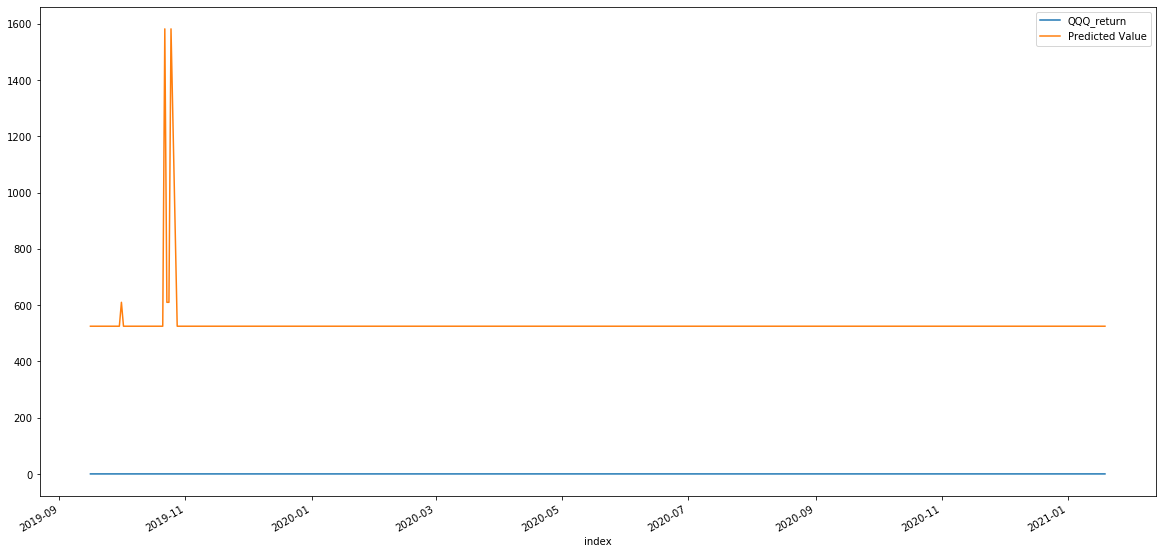

In [195]:
Results[['QQQ_return', 'Predicted Value']].plot(figsize=(20,10))

In [77]:
df_ETFs
df_ETFs.set_index(pd.to_datetime(trading_signals_df['Timestamp'], infer_datetime_format=True), inplace=True)
df_ETFs.drop(columns=['Timestamp'], inplace=True)
df_ETFs

LQD                                         \
                             open     high       low   close      volume   
2011-05-02 00:00:00-04:00  110.05  110.430  109.9600  110.31   1374460.0   
2011-05-03 00:00:00-04:00  110.33  110.400  110.0900  110.25    648982.0   
2011-05-04 00:00:00-04:00  110.46  110.590  110.3100  110.40    656364.0   
2011-05-05 00:00:00-04:00  110.51  110.880  110.5100  110.79    761126.0   
2011-05-06 00:00:00-04:00  110.56  111.030  110.4200  110.77    830286.0   
...                           ...      ...       ...     ...         ...   
2021-01-12 00:00:00-05:00  135.11  135.540  134.7367  135.47  13240352.0   
2021-01-13 00:00:00-05:00  135.76  136.635  135.7300  136.52  15276377.0   
2021-01-14 00:00:00-05:00  136.55  136.630  135.8400  135.96  20916224.0   
2021-01-15 00:00:00-05:00  136.24  136.510  136.0400  136.14  11651363.0   
2021-01-19 00:00:00-05:00  136.09  136.480  136.0500  136.38  11848319.0   

                             PZA                                  ...  \
                            open    high      low  close  volume  ...   
2011-05-02 00:00:00-04:00  22.77  22.810  22.7400  22.75  208419  ...   
2011-05-03 00:00:00-04:00  22.76  22.850  22.7600  22.82   83321  ...   
2011-05-04 00:00:00-04:00  22.86  22.990  22.8115  22.94  140827  ...   
2011-05-05 00:00:00-04:00  22.99  23.050  22.9480  23.03  256741  ...   
2011-05-06 00:00:00-04:00  23.05  23.070  23.0000  23.00  109594  ...   
...                          ...     ...      ...    ...     ...  ...   
2021-01-12 00:00:00-05:00  27.03  27.070  27.0000  27.04  836358  ...   
2021-01-13 00:00:00-05:00  27.07  27.090  27.0200  27.09  450882  ...   
2021-01-14 00:00:00-05:00  27.09  27.110  27.0415  27.05  559931  ...   
2021-01-15 00:00:00-05:00  27.10  27.125  27.0600  27.10  314751  ...   
2021-01-19 00:00:00-05:00  27.06  27.100  27.0390  27.08  775158  ...   

                              VMBS                                       \
                              open     high     low    close     volume   
2011-05-02 00:00:00-04:00  50.7348  50.7900  50.730  50.7700     9903.0   
2011-05-03 00:00:00-04:00  50.8100  50.8700  50.738  50.8590     3887.0   
2011-05-04 00:00:00-04:00  50.8300  50.9100  50.760  50.8176     3146.0   
2011-05-05 00:00:00-04:00  50.9200  51.0200  50.920  50.9880     1731.0   
2011-05-06 00:00:00-04:00  51.0100  51.1200  50.988  51.0400    11474.0   
...                            ...      ...     ...      ...        ...   
2021-01-12 00:00:00-05:00  53.8400  54.0000  53.830  53.9100  2122541.0   
2021-01-13 00:00:00-05:00  53.9200  53.9900  53.920  53.9700  5885304.0   
2021-01-14 00:00:00-05:00  53.9800  54.0200  53.970  53.9900  1672910.0   
2021-01-15 00:00:00-05:00  54.0752  54.0752  53.990  54.0300  2218101.0   
2021-01-19 00:00:00-05:00  54.0000  54.0400  53.980  54.0100  1616045.0   

                             VNQ                                  
                            open     high    low  close   volume  
2011-05-02 00:00:00-04:00  62.13  62.3600  61.40  61.90  2324829  
2011-05-03 00:00:00-04:00  61.74  62.1900  60.69  61.39  1828226  
2011-05-04 00:00:00-04:00  61.29  61.4900  60.75  61.05  1577434  
2011-05-05 00:00:00-04:00  60.71  61.4500  60.52  60.97  1846927  
2011-05-06 00:00:00-04:00  61.50  61.5500  60.29  60.45  2121920  
...                          ...      ...    ...    ...      ...  
2021-01-12 00:00:00-05:00  81.86  82.2300  81.23  82.10  7817888  
2021-01-13 00:00:00-05:00  82.22  83.3300  82.21  83.17  8129303  
2021-01-14 00:00:00-05:00  83.44  84.2200  83.13  83.65  5180799  
2021-01-15 00:00:00-05:00  83.46  84.8727  83.18  84.63  3906582  
2021-01-19 00:00:00-05:00  85.14  85.1800  83.99  84.31  5378034  

[2446 rows x 35 columns]